# Import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib.ticker import PercentFormatter, MultipleLocator

# Constants

In [2]:
MODELS = [
    "SRMP_WPL",
    "SRMP_PL",
    "SRMP_WL",
    "SRMP_L",
    # "SRMP_WP",
    # "SRMP_P",
    # "SRMP_W",
    # "SRMP",
]

# Results directory

In [3]:
RESULTS_DIR = Path("results/MIP_Me/")

# File

In [4]:
TRAIN_FILE = RESULTS_DIR / "train_results.csv"
TEST_FILE = RESULTS_DIR / "test_results.csv"

# Read files

In [5]:
df_train = pd.read_csv(TRAIN_FILE)
df_test = pd.read_csv(TEST_FILE)

# Merge data

In [6]:
df = pd.merge(
    df_train,
    df_test,
    on=[
        "M",
        "N_tr",
        "Atr_id",
        "Mo",
        "Ko",
        "Group_size",
        "Mo_id",
        "N_bc",
        "Same_alt",
        "Error",
        "D_id",
        "Me",
        "Ke",
        "Method",
        "Config",
        "Me_id",
    ],
    suffixes=["_train", "_test"],
)
df

,M,N_tr,Atr_id,Mo,Ko,Group_size,Mo_id,N_bc,Same_alt,Error,...,Me_id,Time,Fitness_train,It.,N_te,Ate_id,Fitness_test,Kendall's tau,Mo Intra Kendall's tau,Me Intra Kendall's tau
0,3,20,3,SRMP_WPL,1,2,3,10,True,0,...,3,0.102941,1.00,NaN,20,3,0.910526,0.904946,1.000000,1.000000
1,3,20,3,SRMP_WPL,1,2,3,10,True,0,...,3,0.191530,1.00,NaN,20,3,0.747368,0.699260,1.000000,0.874075
2,3,20,0,SRMP_WPL,1,2,0,10,True,0,...,0,0.109252,1.00,NaN,20,0,0.489474,0.261199,1.000000,1.000000
3,3,20,3,SRMP_WPL,1,2,3,10,True,0,...,3,0.146187,1.00,NaN,20,3,0.836842,0.672483,1.000000,0.760684
4,3,20,3,SRMP_WPL,1,2,3,20,True,0,...,3,0.178886,1.00,NaN,20,3,0.900000,0.896033,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43195,7,20,3,SRMP_L,1,2,3,90,True,0,...,3,3600.422974,0.00,NaN,20,3,NaN,NaN,NaN,NaN
43196,7,20,3,SRMP_L,1,2,3,100,True,0,...,3,3600.344637,0.76,NaN,20,3,0.663158,0.376366,0.096309,1.000000
43197,7,20,3,SRMP_L,1,2,3,100,True,0,...,3,3600.194963,0.00,NaN,20,3,NaN,NaN,NaN,NaN
43198,7,20,3,SRMP_L,1,2,3,100,True,0,...,3,3600.301820,0.00,NaN,20,3,NaN,NaN,NaN,NaN


In [9]:
df["Mo"] = df["Mo"].str[5:]
df["Me"] = df["Me"].str[5:]

# Process

In [8]:
df["Mo_Weights_shared"] = df["Mo"].isin(["SRMP_WPL", "SRMP_WL", "SRMP_WP", "SRMP_W"])
df["Mo_Profiles_shared"] = df["Mo"].isin(["SRMP_WPL", "SRMP_PL", "SRMP_WP", "SRMP_P"])
df["Mo_Lexicographic_shared"] = df["Mo"].isin(["SRMP_WPL", "SRMP_WL", "SRMP_PL", "SRMP_L"])

df["Me_Weights_shared"] = df["Me"].isin(["SRMP_WPL", "SRMP_WL", "SRMP_WP", "SRMP_W"])
df["Me_Profiles_shared"] = df["Me"].isin(["SRMP_WPL", "SRMP_PL", "SRMP_WP", "SRMP_P"])
df["Me_Lexicographic_shared"] = df["Me"].isin(["SRMP_WPL", "SRMP_WL", "SRMP_PL", "SRMP_L"])

# Filter

In [9]:
dff = df[df["Fitness_train"] == 1]
# dff = df[df["N_tr"].isin([10, 20, 30, 80, 90, 100])]
# dff = df[df["N_tr"] % 20 == 0]

# Plot

## Solutions non-optimales

##### Nombre de solutions non-optimales :
- toutes optimales avec 10 comparaisons, ou lorsque 1 profil
- **augmente** avec le nombre de **comparaisons** (plus de contraintes)
- **augmente** avec le nombre de **profiles** (plus de variables)
- **diminue** avec le nombre de **critères**, pour **3 profils**, et atteint un maximum pour **5 critères** avec **2 profils**
- **augmente** quand l'ordre lexicographique n'est pas partagé (plus de combinaisons à tester)
- **augmente** avec la taille du **groupe** (plus de variables et contraintes)

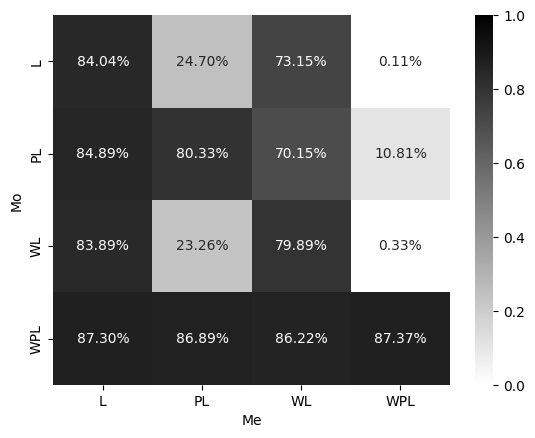

In [12]:
MAX = 2700

g = sns.heatmap(
    data=df[df["Fitness_train"] == 1].pivot_table(index="Mo", columns="Me", aggfunc="size", fill_value=0) / MAX,
    vmin=0,
    vmax=1,
    cmap="binary",
    annot=True,
    fmt=".2%",
)
plt.savefig("test.pdf")

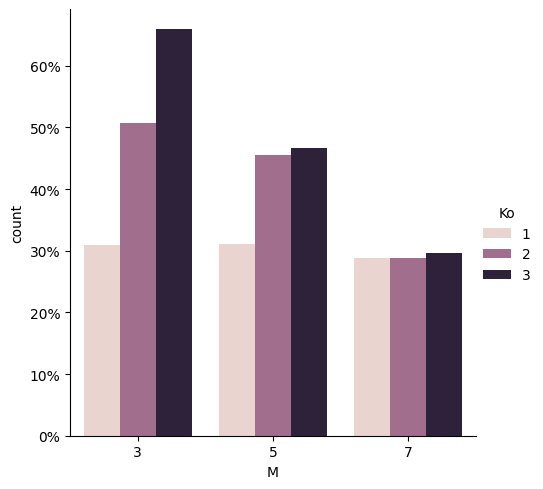

In [11]:
g = sns.catplot(
    data=df[(df["Group_size"] == 2) & (df["Fitness_train"] < 1)],
    x="M",
    hue="Ko",
    # row="Mo",
    # col="M",
    # row_order=MODELS,
    # col_order=MODELS,
    kind="count",
)

MAX = 4800

for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(MAX))
    ax.yaxis.set_major_locator(MultipleLocator(MAX / 10))

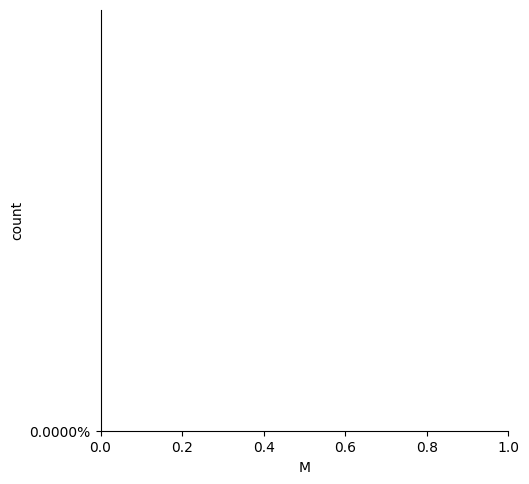

In [35]:
g = sns.catplot(
    data=df[
        (df["Group_size"] == 2)
        & (df["Fitness_train"] < 1)
        & (df["Mo_Lexicographic_shared"] == False)
    ],
    x="M",
    hue="Ko",
    # row="Mo",
    # col="M",
    # row_order=MODELS,
    # col_order=MODELS,
    kind="count",
)

MAX = 2400

for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(MAX))
    ax.yaxis.set_major_locator(MultipleLocator(MAX / 10))

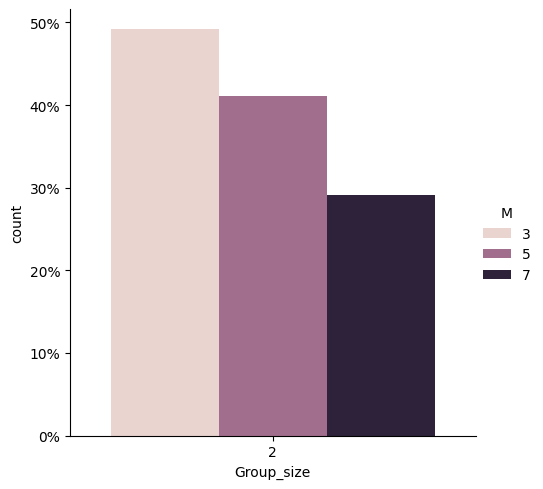

In [13]:
g = sns.catplot(
    data=df[df["Fitness_train"] < 1],
    x="Group_size",
    hue="M",
    # row="Mo",
    # col="M",
    # row_order=MODELS,
    # col_order=MODELS,
    kind="count",
)

MAX = 14400

for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(MAX))
    ax.yaxis.set_major_locator(MultipleLocator(MAX / 10))

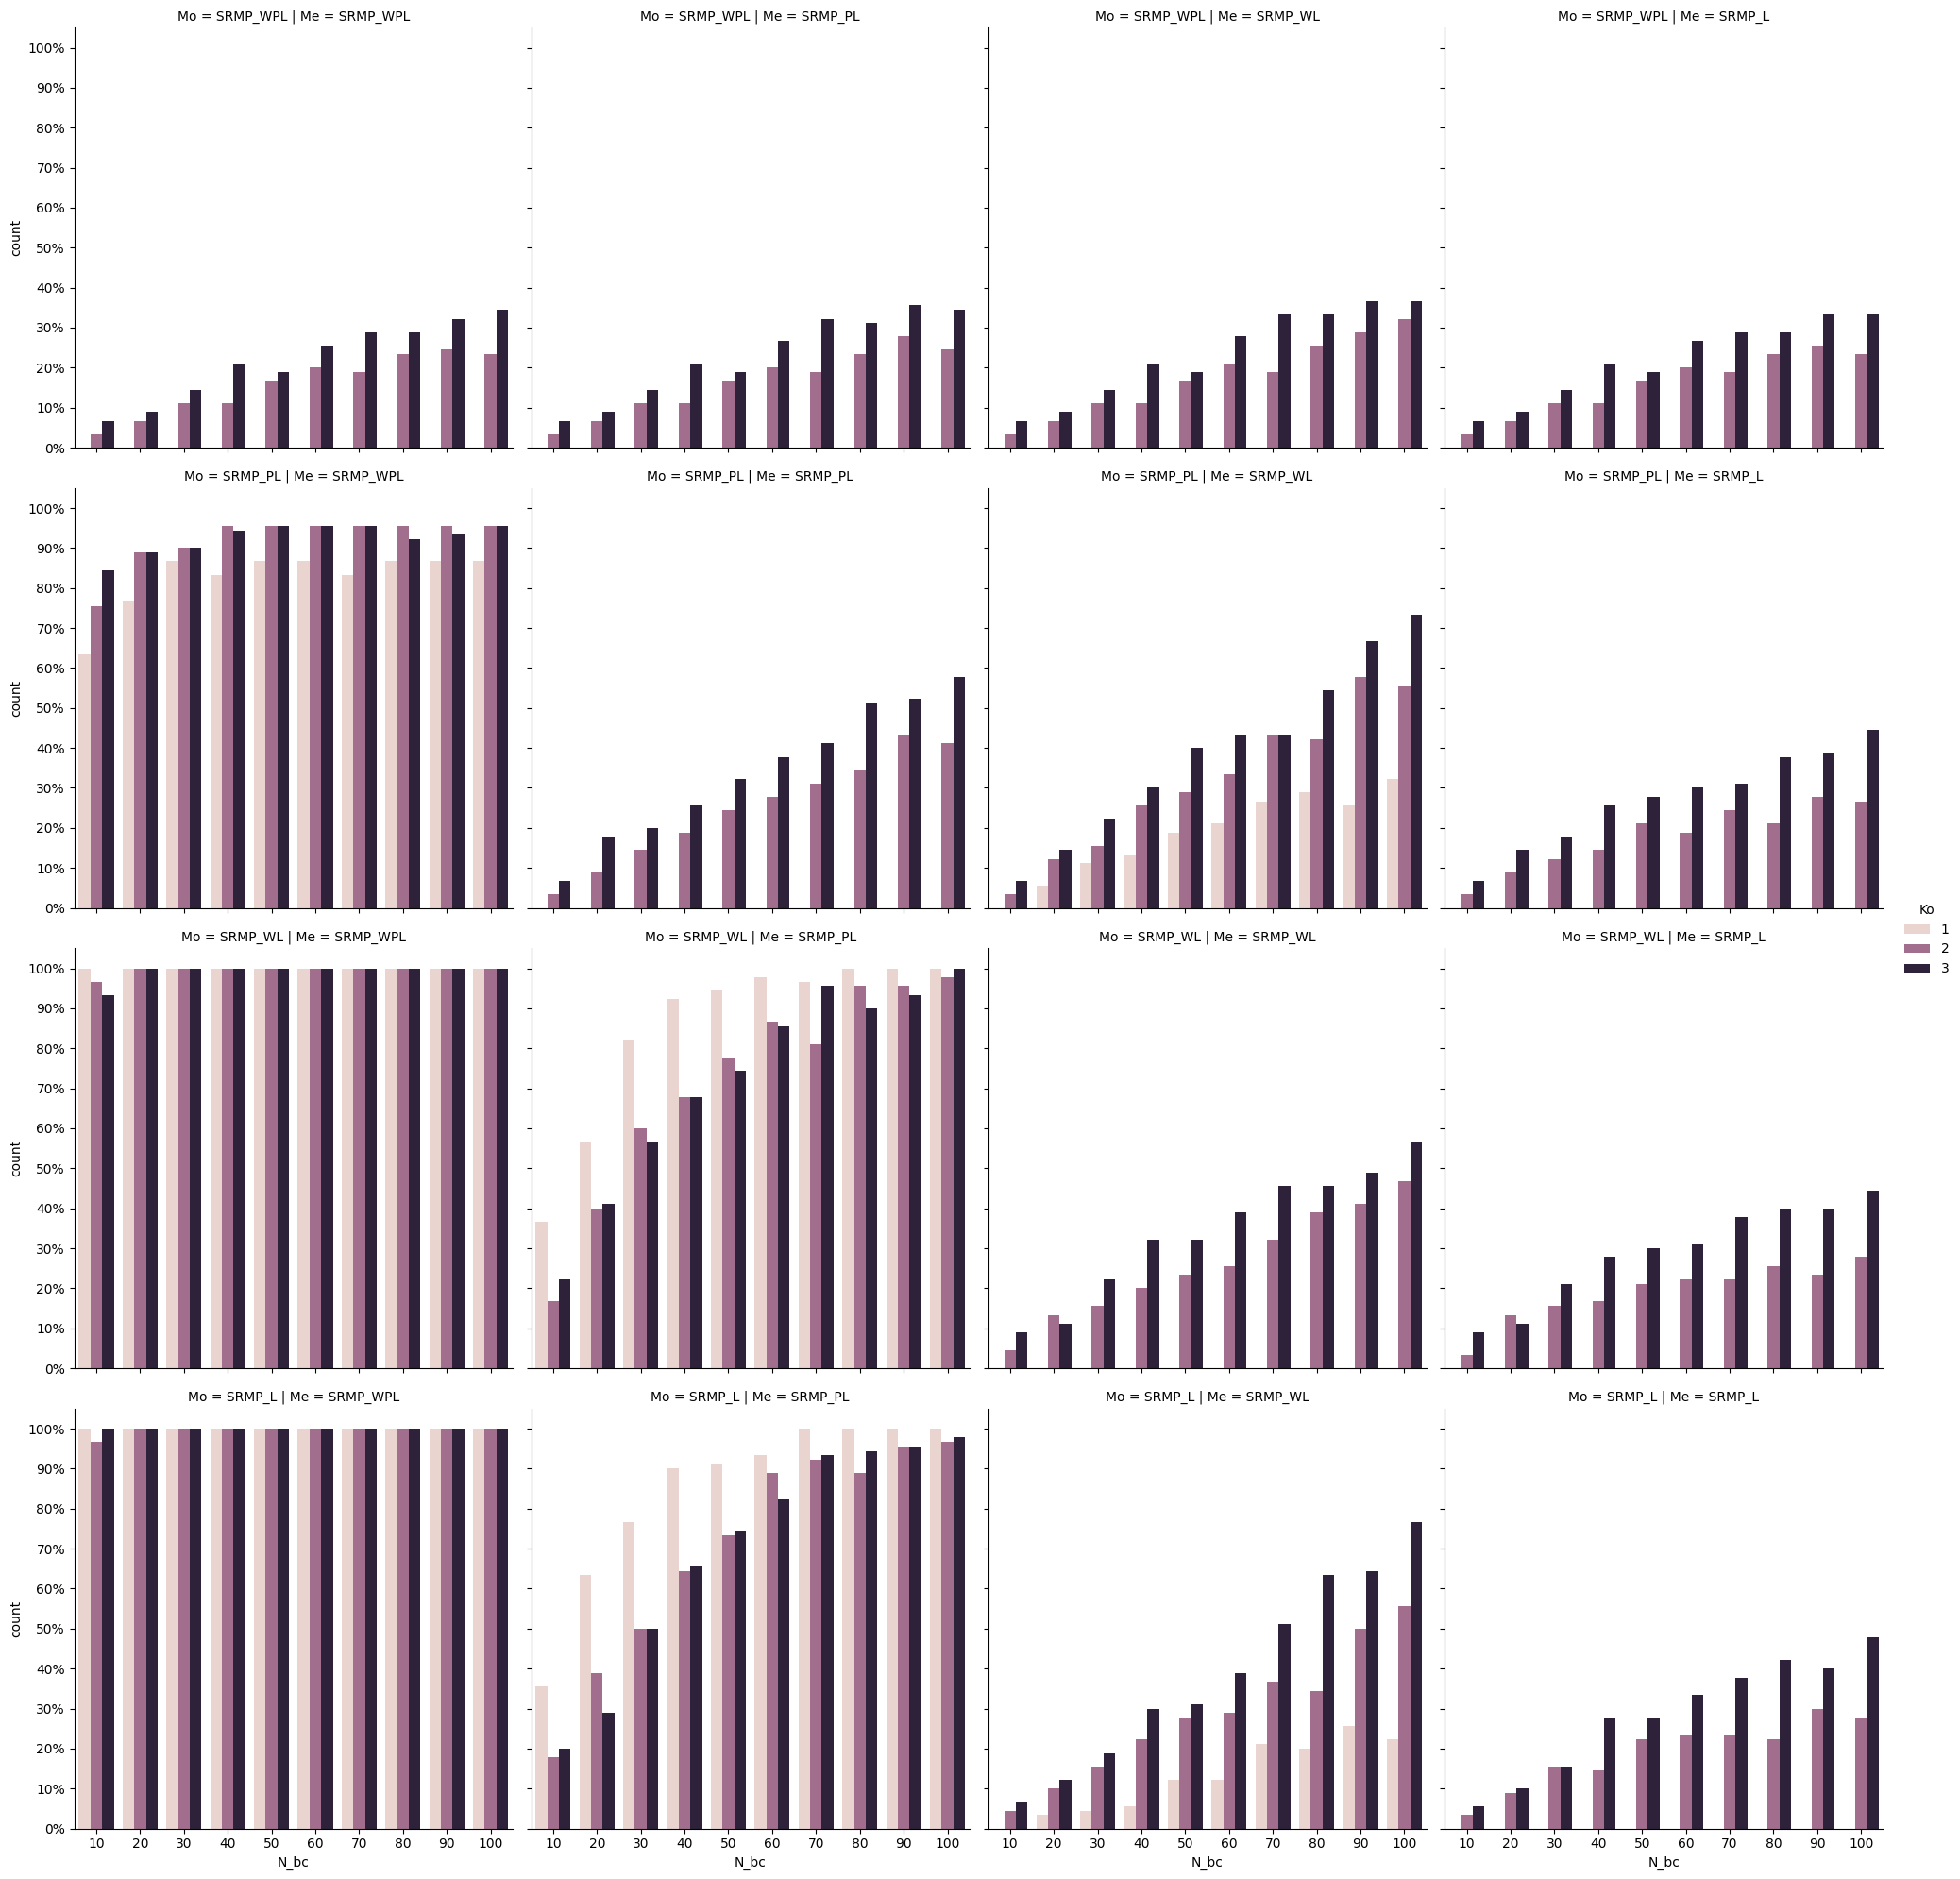

In [14]:
g = sns.catplot(
    data=df[(df["Group_size"] == 2) & (df["Fitness_train"] < 1)],
    x="N_bc",
    hue="Ko",
    row="Mo",
    col="Me",
    row_order=MODELS,
    col_order=MODELS,
    kind="count",
)

MAX = 90

for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(MAX))
    ax.yaxis.set_major_locator(MultipleLocator(MAX / 10))

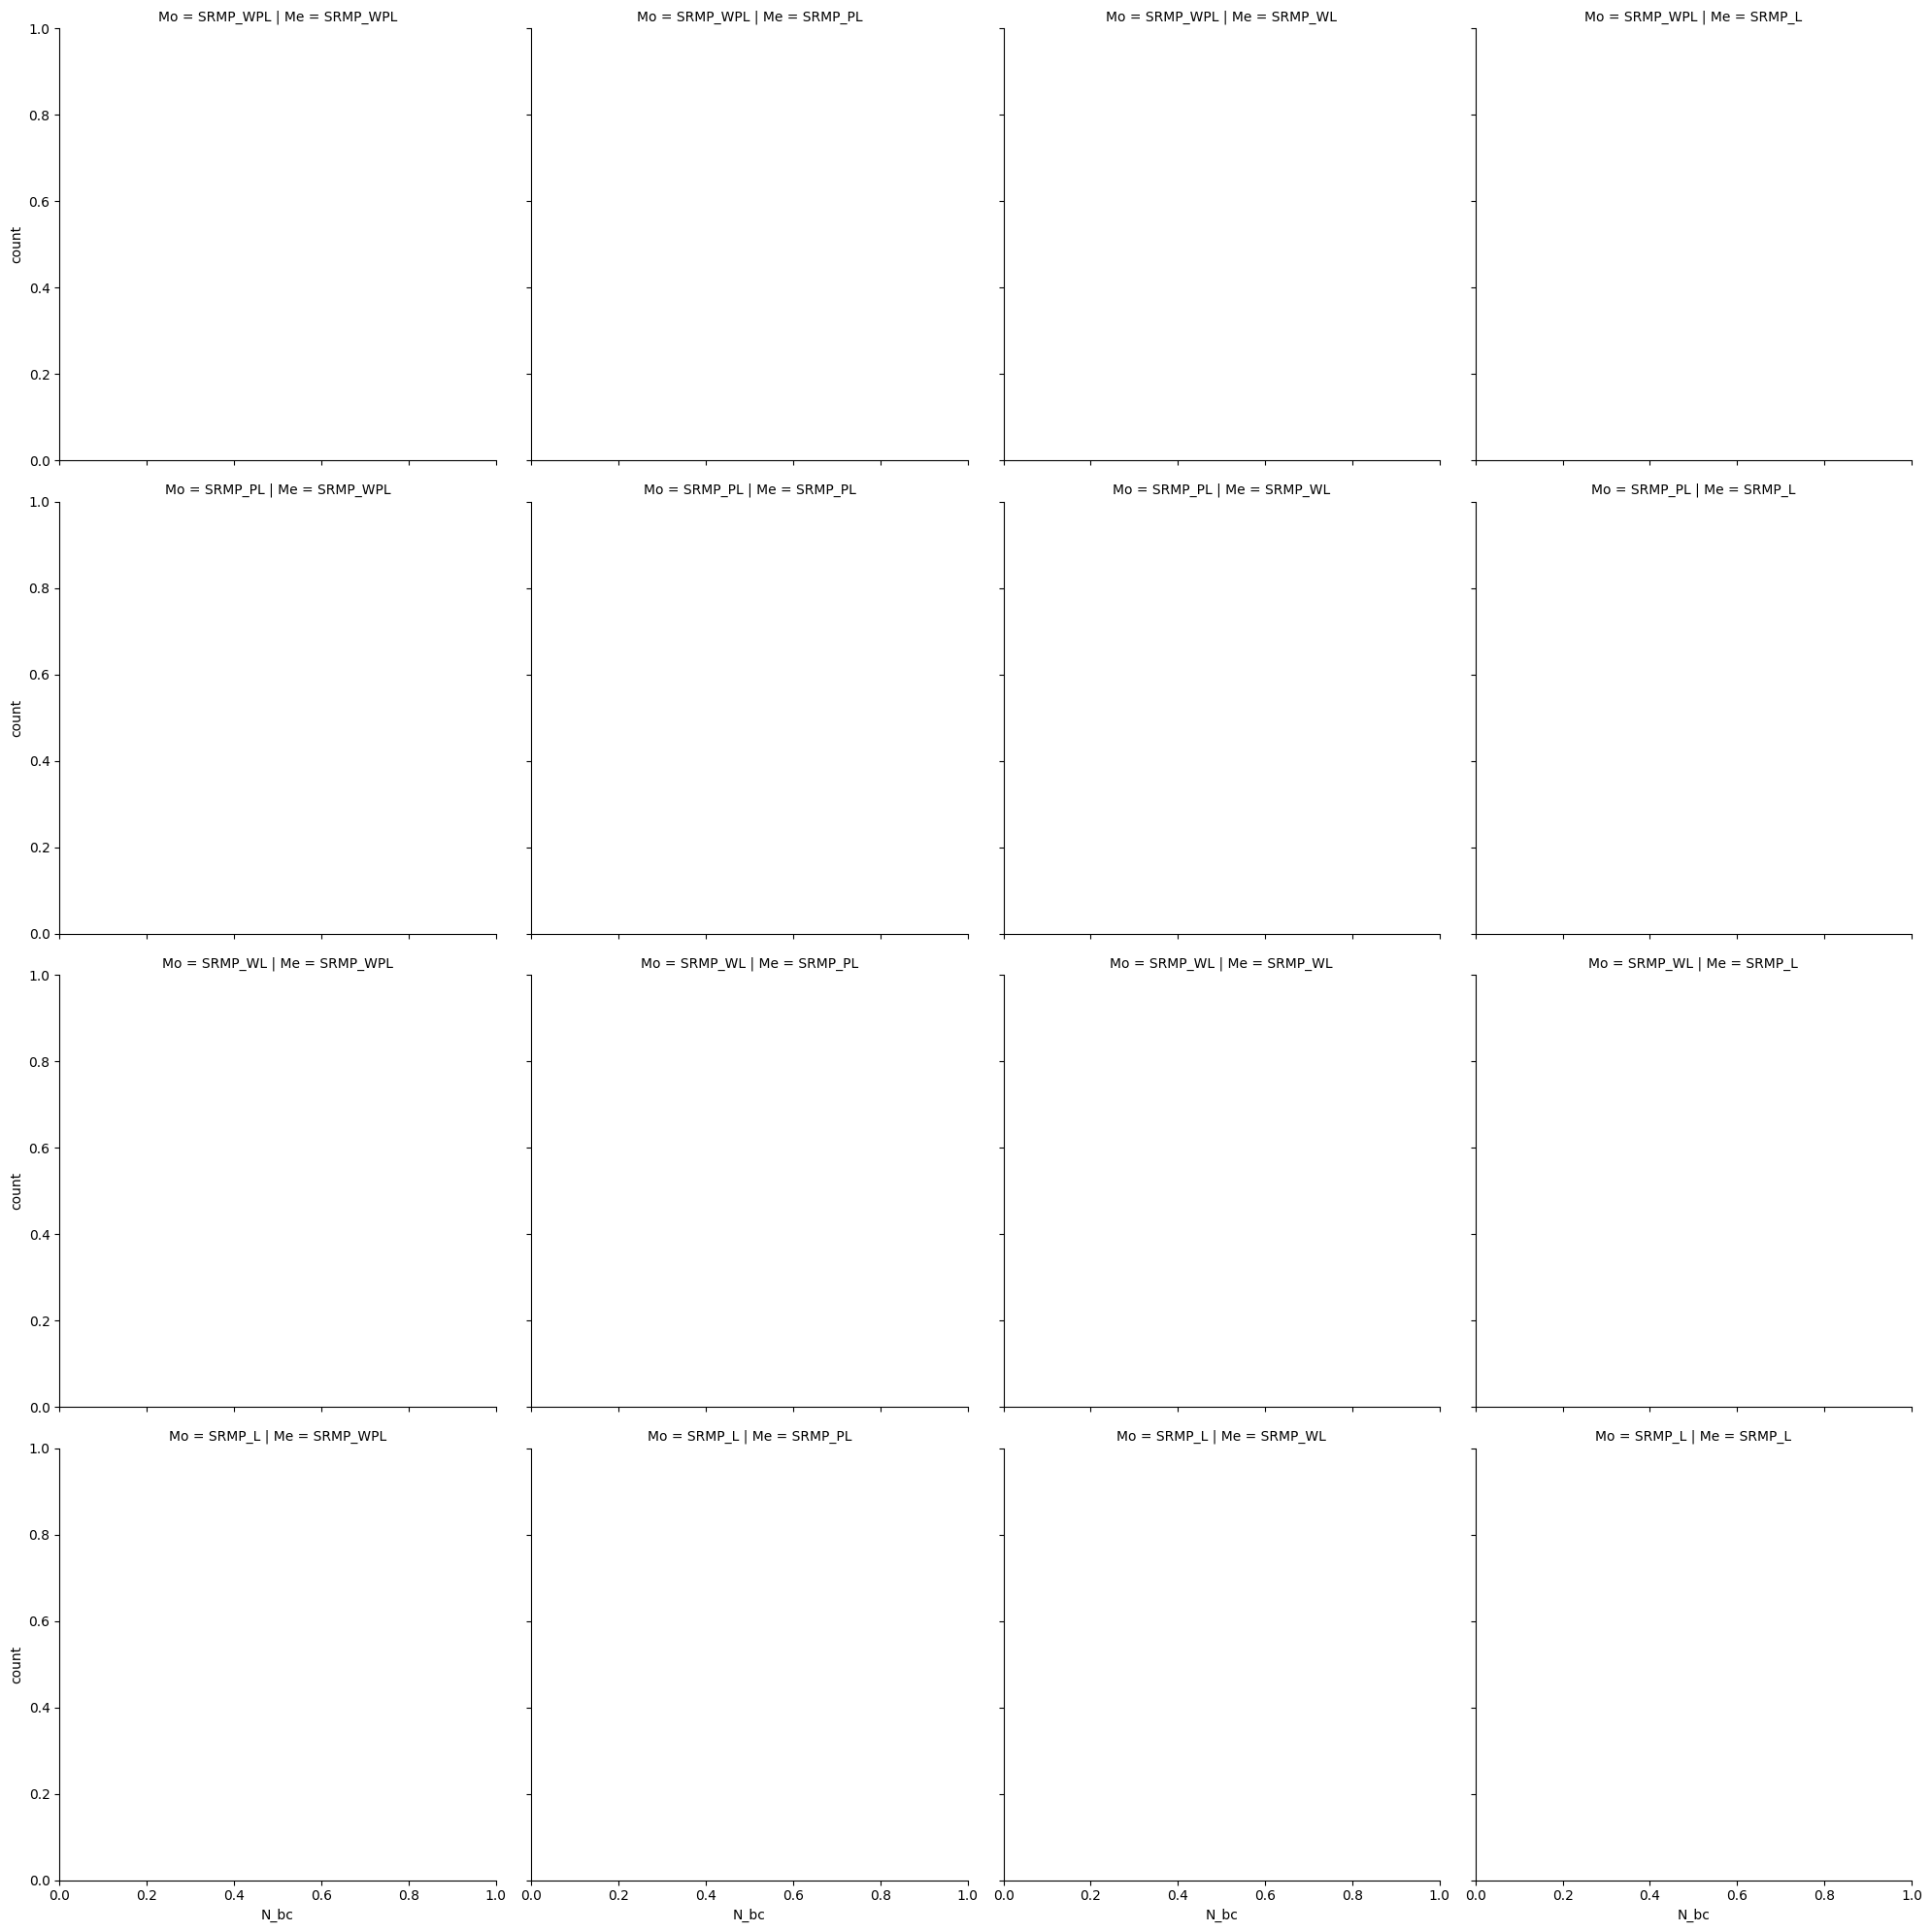

In [15]:
sns.catplot(
    data=df[(df["Group_size"] == 3) & (df["Fitness_train"] < 1)],
    x="N_bc",
    hue="M",
    row="Mo",
    col="Me",
    row_order=MODELS,
    col_order=MODELS,
    kind="count",
)

MAX = 90

for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(MAX))
    ax.yaxis.set_major_locator(MultipleLocator(MAX / 10))

## Time

##### Temps :
- **augmente** *exponentiellement* avec le nombre de **comparaisons** (plus de contraintes)
- **augmente** ~ *exponentiellement* avec le nombre de **profiles** (plus de variables)
- **augmente** avec le nombre de **critères** lorsque **1 profile**, mais **diminue** lorsque **3 profiles**
- **augmente** quand l'ordre lexicographique n'est pas partagé (plus de combinaisons à tester)
- **augmente** avec la taille du **groupe** (plus de variables et contraintes)

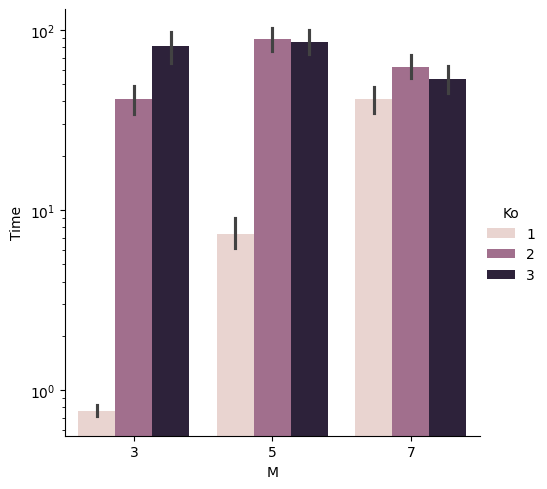

In [16]:
sns.catplot(
    data=dff[dff["Group_size"] == 2],
    x="M",
    y="Time",
    hue="Ko",
    # split=True,
    # row="Weights_shared",
    # col="M",
    # row_order=MODELS,
    # col_order=MODELS,
    kind="bar",
)
plt.yscale("log")

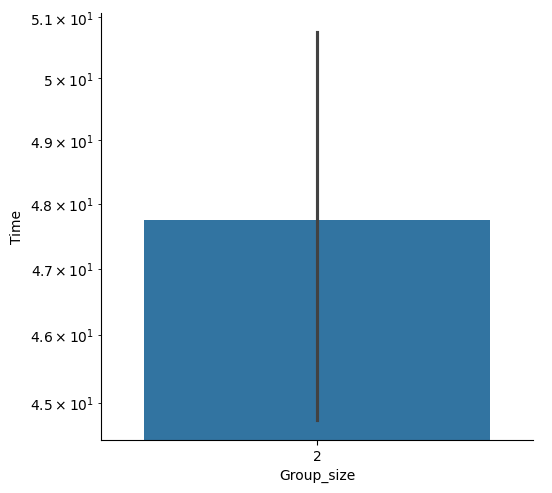

In [17]:
sns.catplot(
    data=dff,
    x="Group_size",
    y="Time",
    # hue="Ko",
    # split=True,
    # row="Weights_shared",
    # col="M",
    # row_order=MODELS,
    # col_order=MODELS,
    kind="bar",
)
plt.yscale("log")

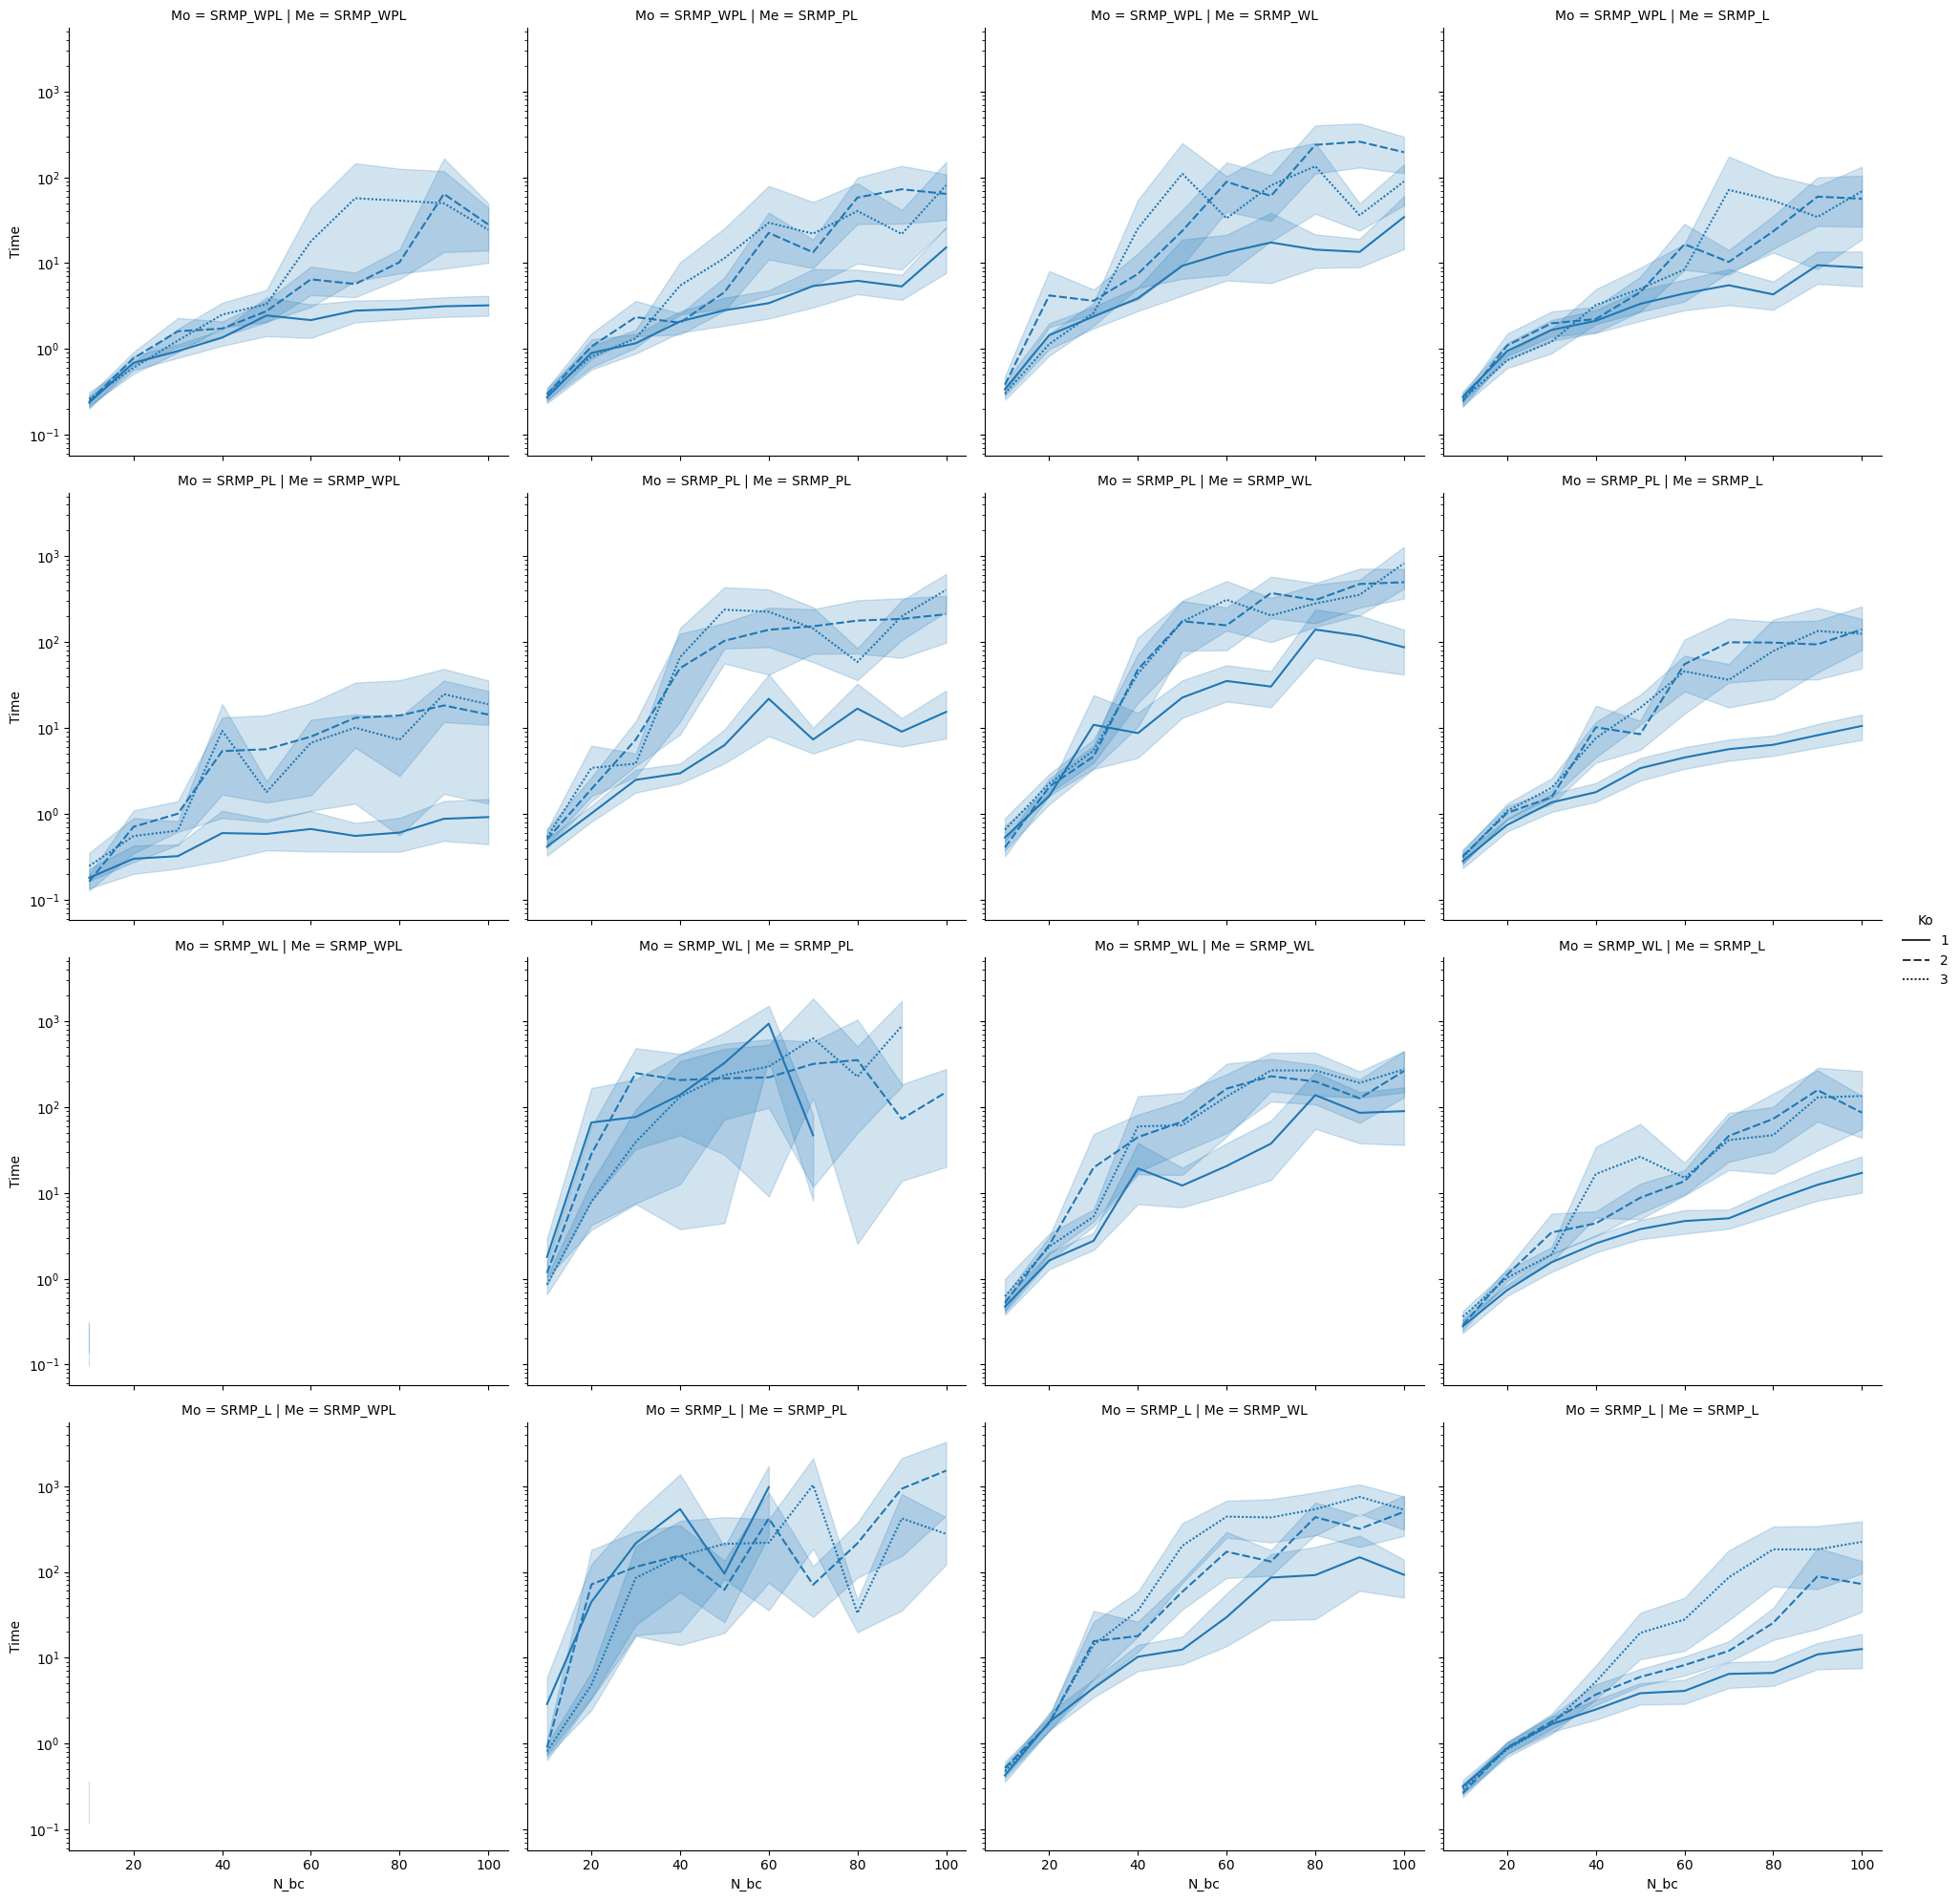

In [18]:
sns.relplot(
    data=dff[dff["Group_size"] == 2],
    x="N_bc",
    y="Time",
    # hue="Group_size",
    style="Ko",
    row="Mo",
    col="Me",
    row_order=MODELS,
    col_order=MODELS,
    kind="line",
    # errorbar=("ci", 95),
    # err_style="bars",
    # err_kws={"capsize": 5},
)
plt.yscale("log")

In [19]:
sns.relplot(
    data=dff[dff["Group_size"] == 3],
    x="N_bc",
    y="Time",
    # hue="Group_size",
    style="Ko",
    row="Mo",
    col="Me",
    row_order=MODELS,
    col_order=MODELS,
    kind="line",
    # errorbar=("ci", 95),
    # err_style="bars",
    # err_kws={"capsize": 5},
)
plt.yscale("log")

TypeError: 'NoneType' object is not iterable

## Train fitness

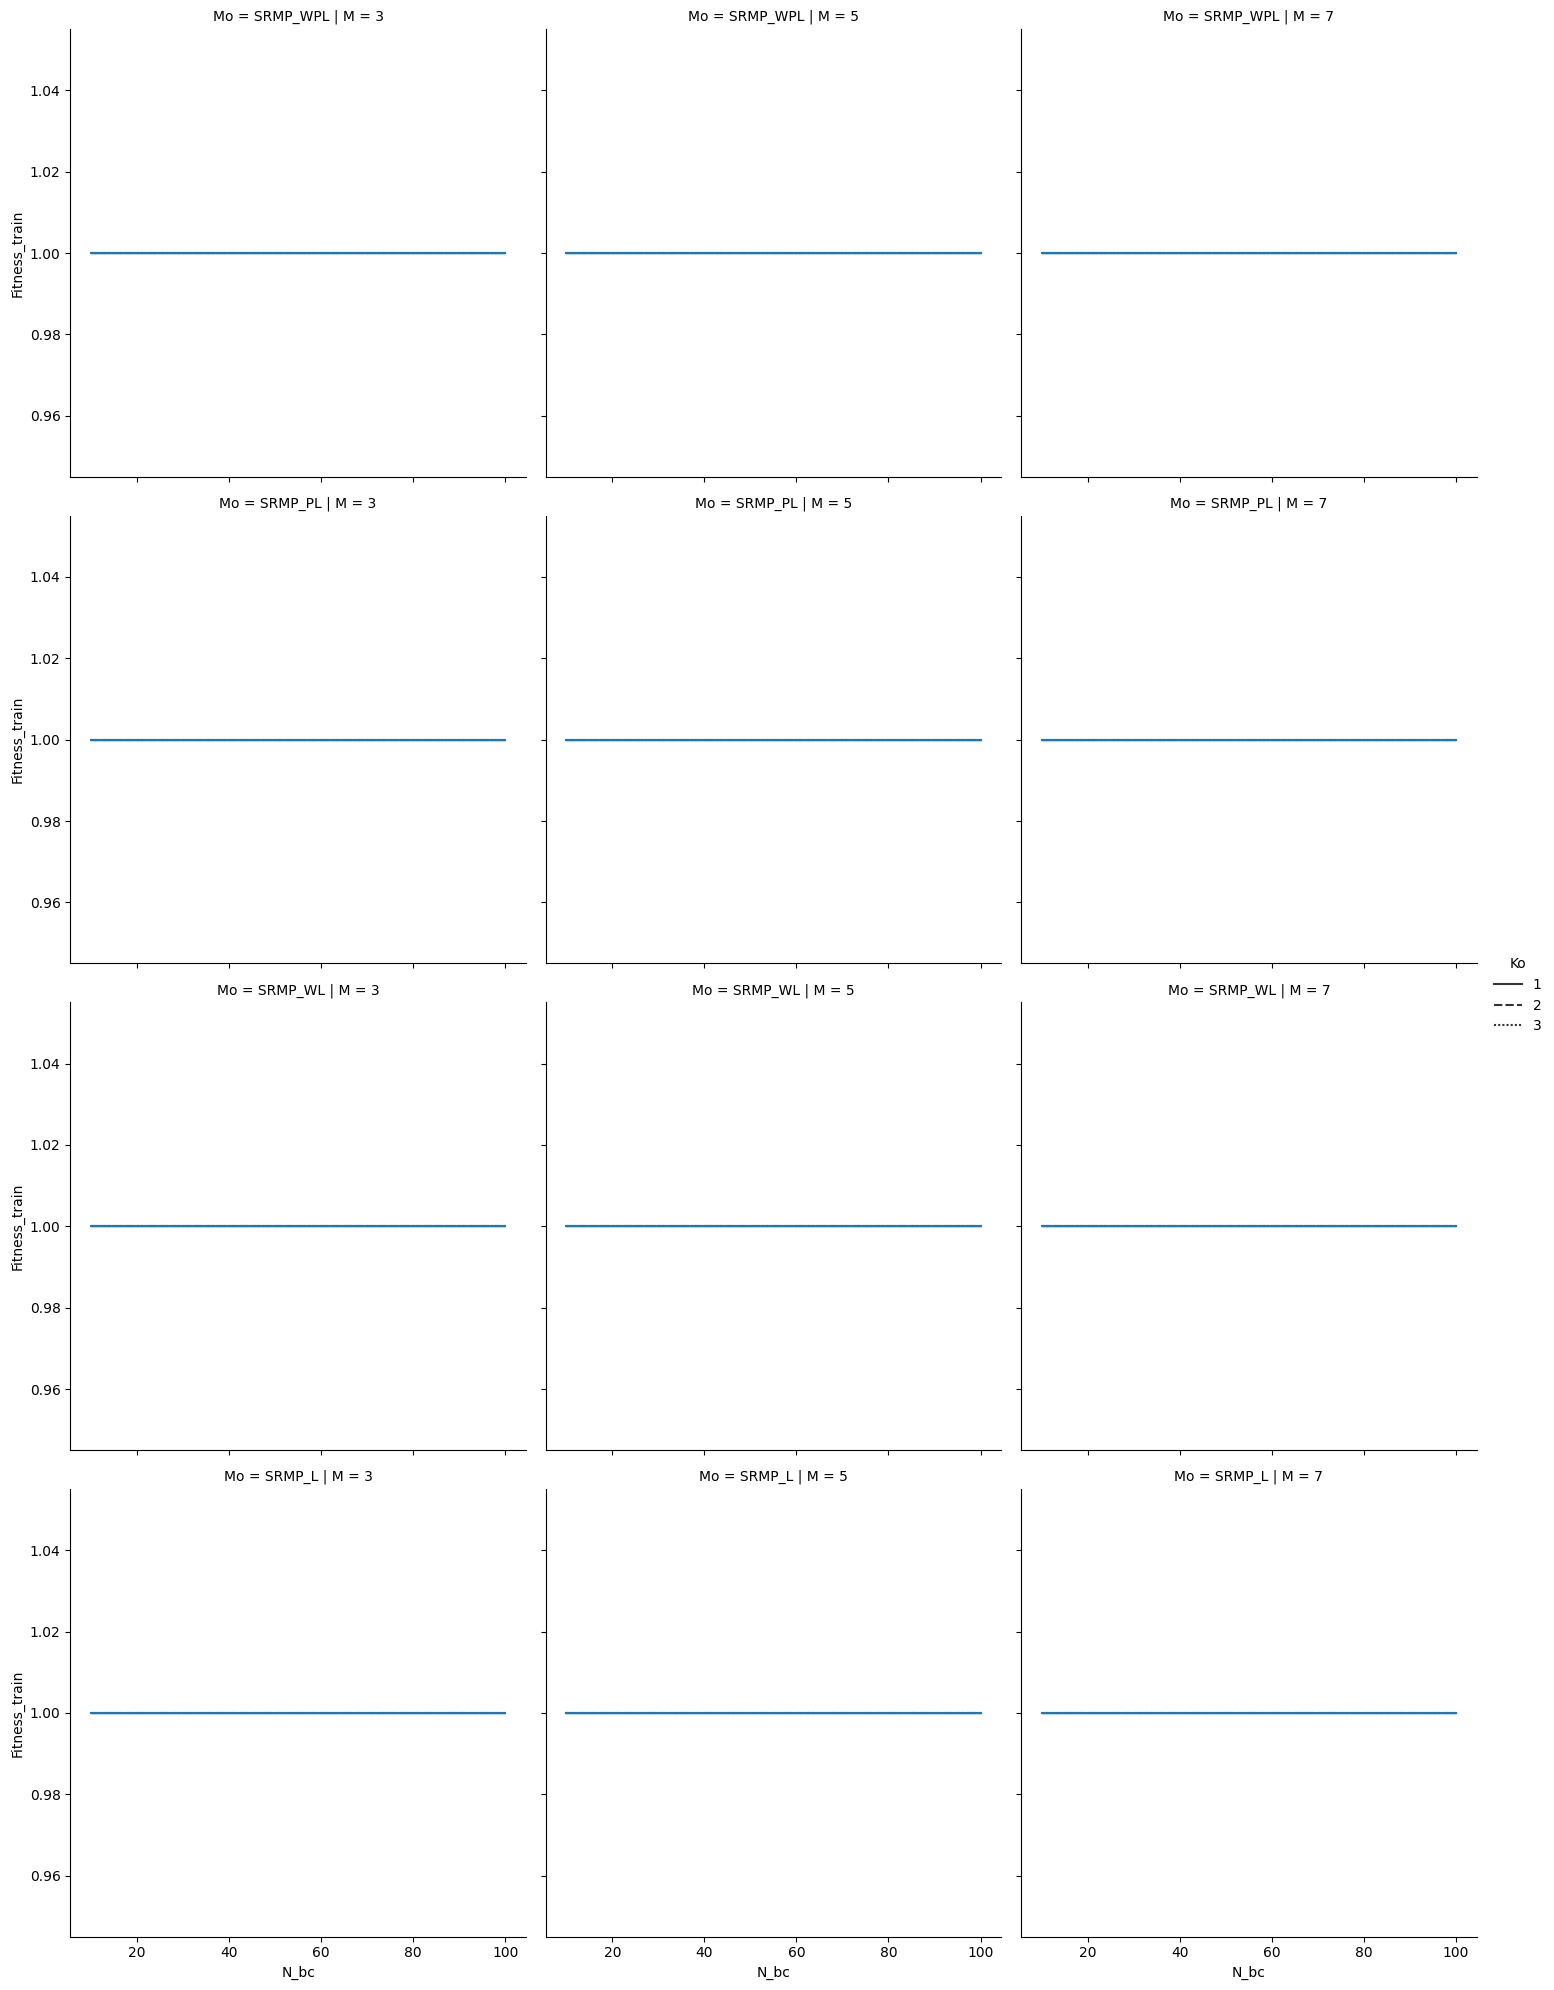

In [37]:
sns.relplot(
    data=dff[dff["Group_size"] == 2],
    x="N_bc",
    y="Fitness_train",
    style="Ko",
    # hue="Group_size",
    row="Mo",
    col="M",
    row_order=MODELS,
    # col_order=MODELS,
    kind="line",
    # errorbar=("ci", 95),
    # err_style="bars",
    # err_kws={"capsize": 5},
)

## Test fitness

##### Test fitness :
- **augmente** avec le nombre de **comparaisons** (plus de données sur les préférences)
- ne **varie pas** avec le nombre de **profiles** (diminution attendue, modèle plus complexe)
- **diminue** avec le nombre de **critères** (données plus complexes)
- **augmente** quand les profiles sont partagés (moins de chances de se tromper de paramètres)
- **diminue** légèrement avec la taille du **groupe** (modèle plus complexe)

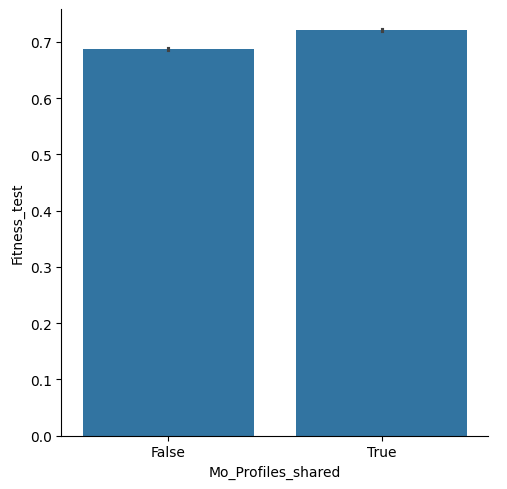

In [26]:
sns.catplot(
    data=dff[dff["Group_size"] == 2],
    x="Mo_Profiles_shared",
    y="Fitness_test",
    # hue="Ko",
    # split=True,
    # row="Weights_shared",
    # col="M",
    # row_order=MODELS,
    # col_order=MODELS,
    kind="bar",
)

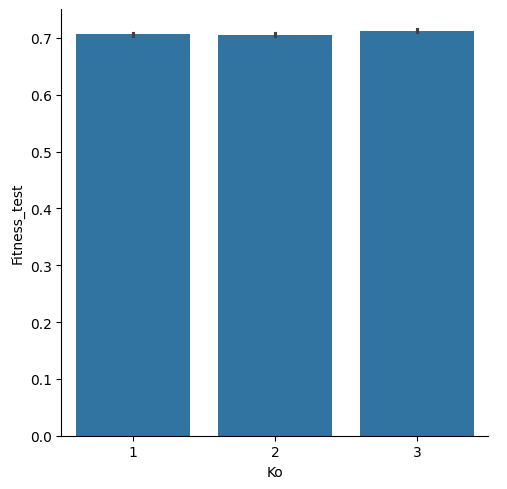

In [22]:
sns.catplot(
    data=dff[dff["Group_size"] == 2],
    x="Ko",
    y="Fitness_test",
    # hue="Ko",
    # split=True,
    # row="Weights_shared",
    # col="M",
    # row_order=MODELS,
    # col_order=MODELS,
    kind="bar",
)

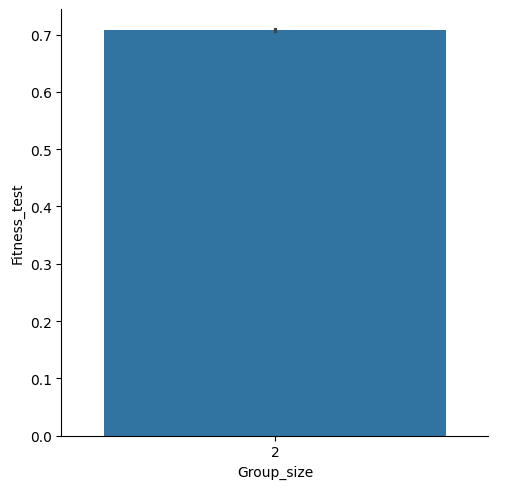

In [23]:
sns.catplot(
    data=dff,
    x="Group_size",
    y="Fitness_test",
    # hue="Ko",
    # split=True,
    # row="Weights_shared",
    # col="M",
    # row_order=MODELS,
    # col_order=MODELS,
    kind="bar",
)

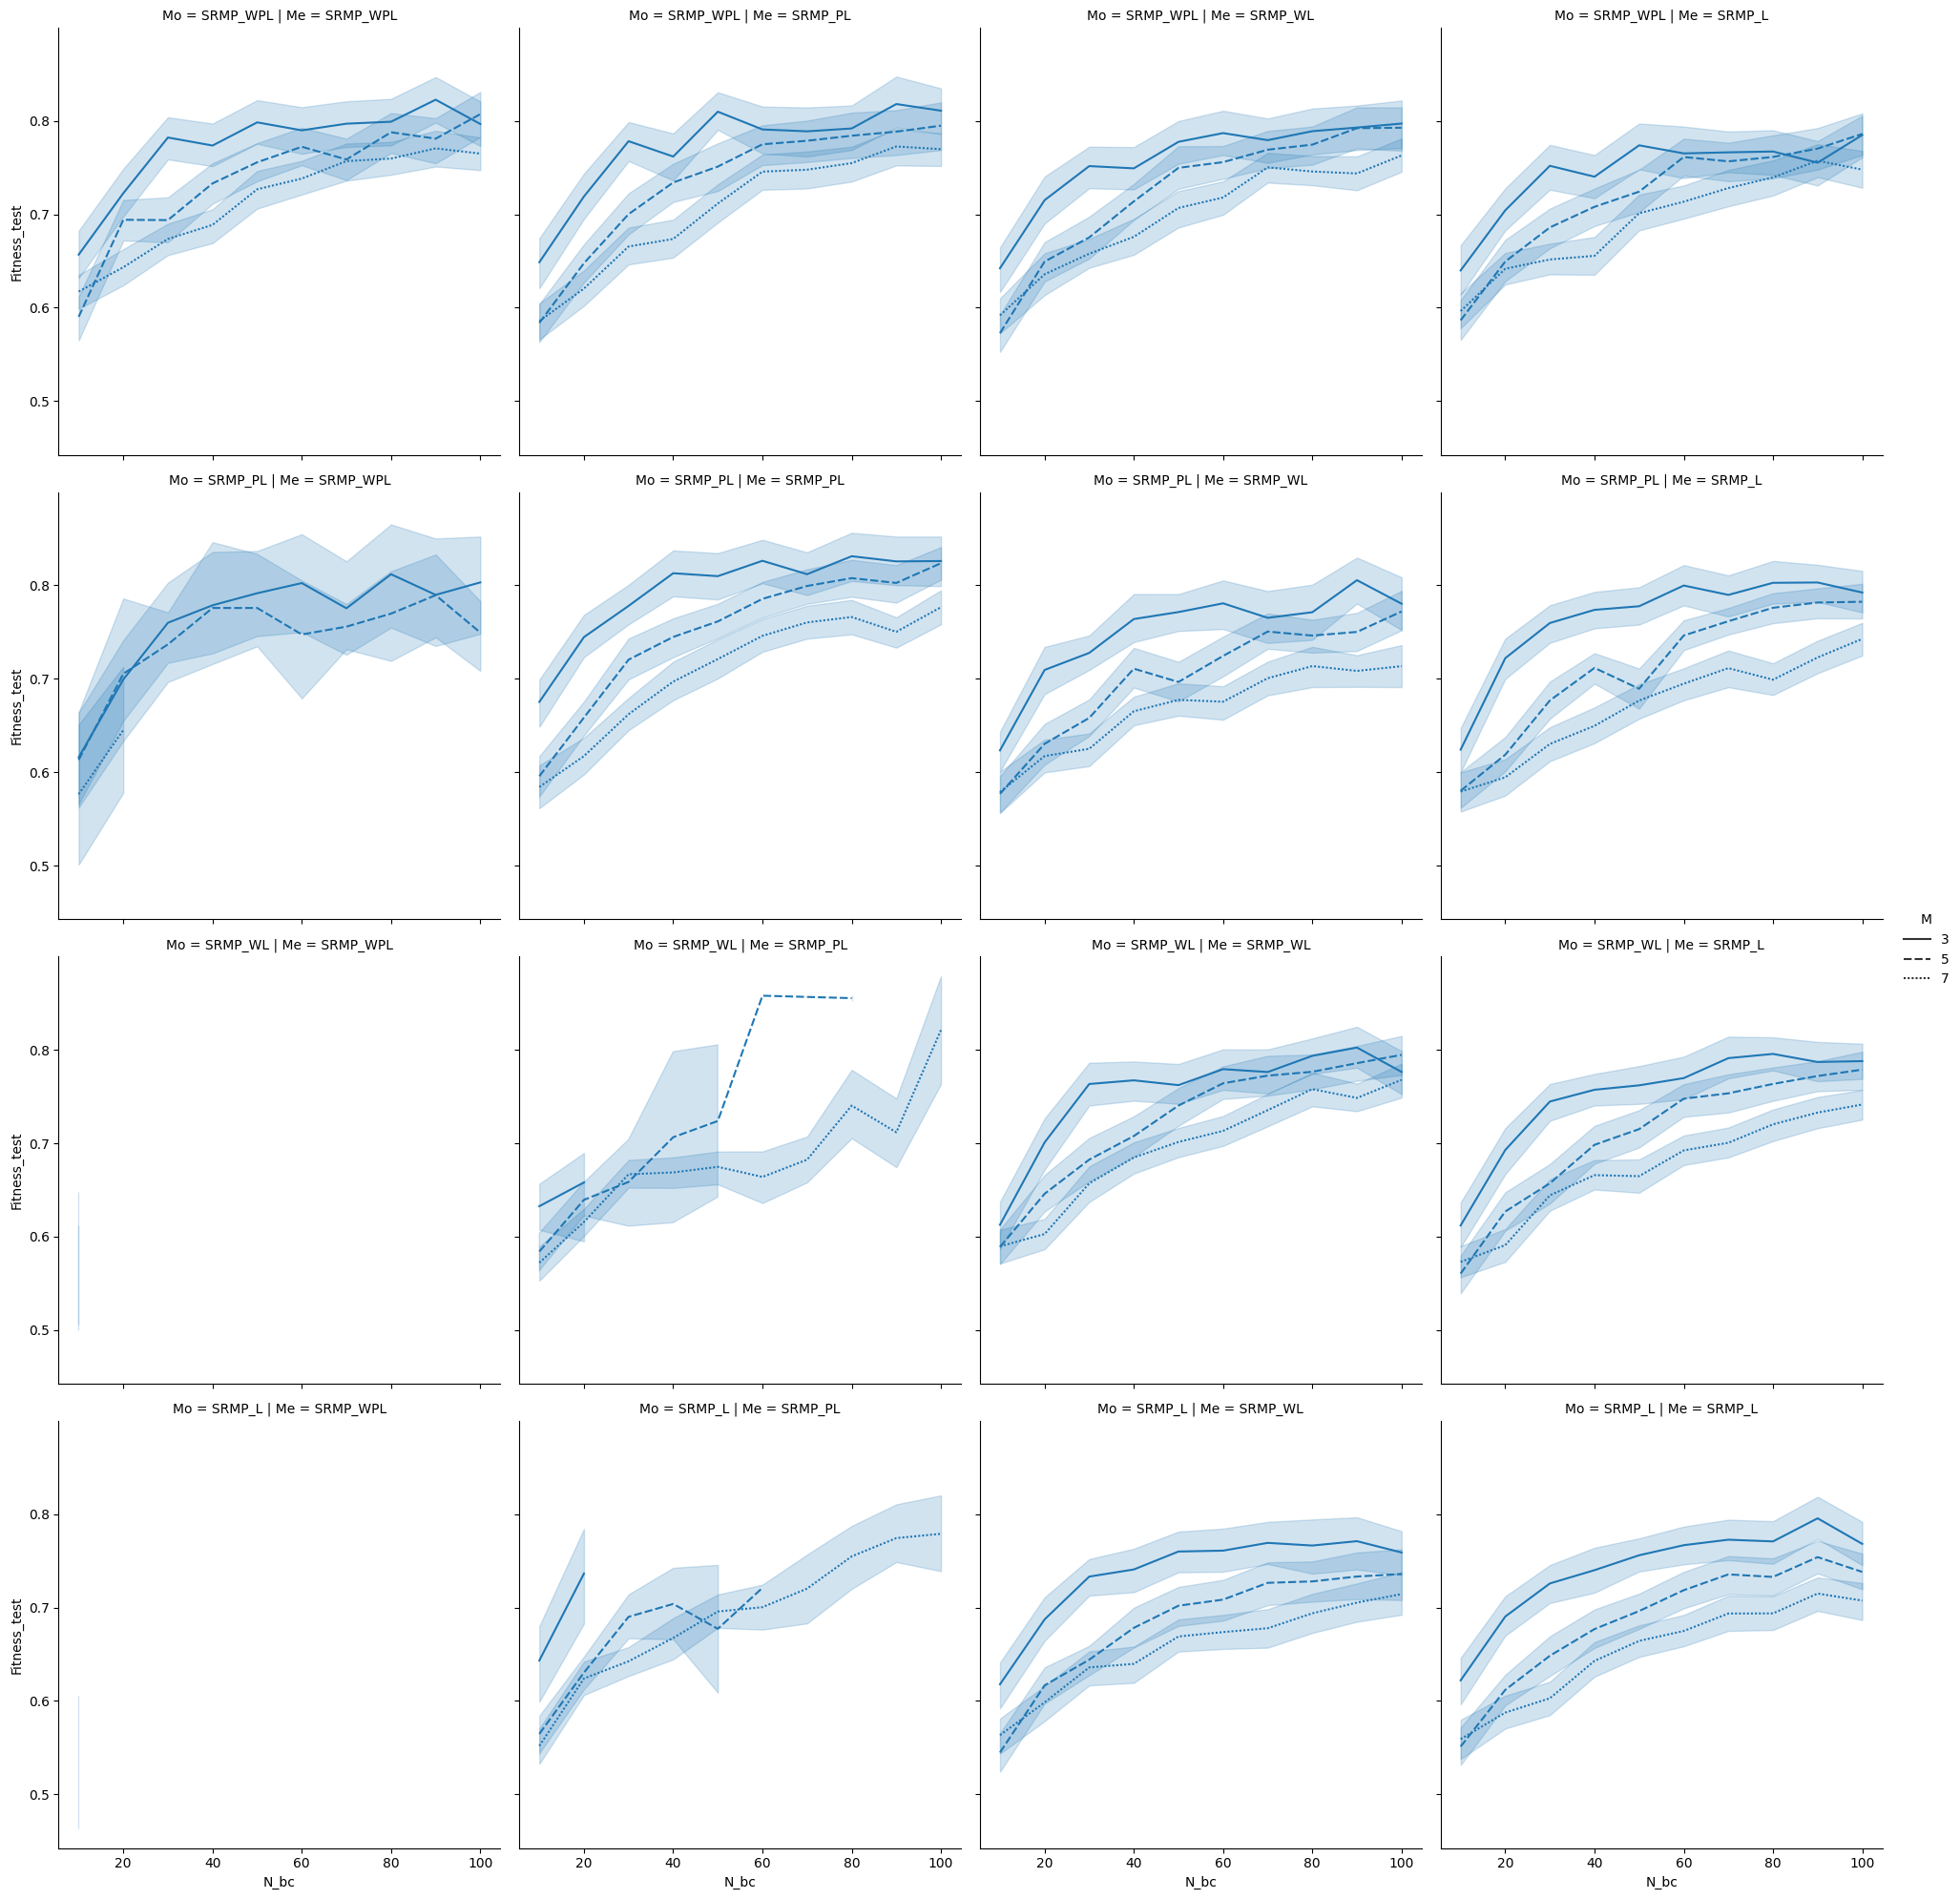

In [24]:
sns.relplot(
    data=dff[dff["Group_size"] == 2],
    x="N_bc",
    y="Fitness_test",
    style="M",
    # hue="Group_size",
    row="Mo",
    col="Me",
    row_order=MODELS,
    col_order=MODELS,
    kind="line",
    # errorbar=("ci", 95),
    # err_style="bars",
    # err_kws={"capsize": 5},
)

In [25]:
sns.relplot(
    data=dff[dff["Group_size"] == 3],
    x="N_bc",
    y="Fitness_test",
    style="M",
    # hue="Group_size",
    row="Mo",
    col="Me",
    row_order=MODELS,
    col_order=MODELS,
    kind="line",
    # errorbar=("ci", 95),
    # err_style="bars",
    # err_kws={"capsize": 5},
)

TypeError: 'NoneType' object is not iterable

## Kendall's tau

##### Kendall's tau :
- **augmente** avec le nombre de **comparaisons** (plus de données sur les préférences)
- **diminue** avec le nombre de **profiles** (modèle plus complexe)
- **diminue** avec le nombre de **critères** (données plus complexes)
- **augmente** quand les paramètres sont partagés (moins de chances de se tromper de paramètres)
- **diminue** légèrement avec la taille du **groupe** (modèle plus complexe)

<Axes: xlabel='Me', ylabel='Mo'>

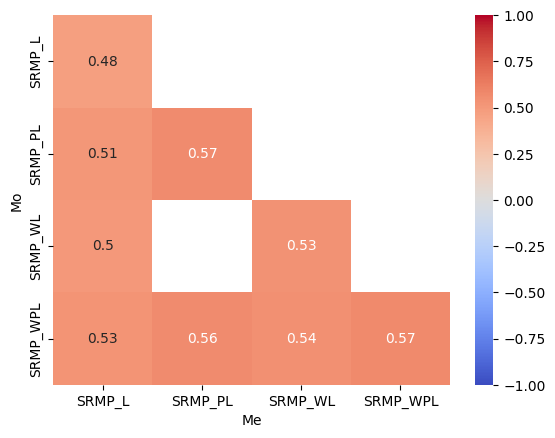

In [27]:
import numpy as np


sns.heatmap(
    data=dff.pivot_table(values="Kendall's tau", index="Mo", columns="Me", aggfunc="mean", fill_value=0),vmin=-1,
    vmax=1,
    cmap="coolwarm",
    annot=True,
    mask=np.array([[0, 1, 1, 1], [0, 0, 1, 1], [0, 1, 0, 1], [0, 0, 0, 0]])
)

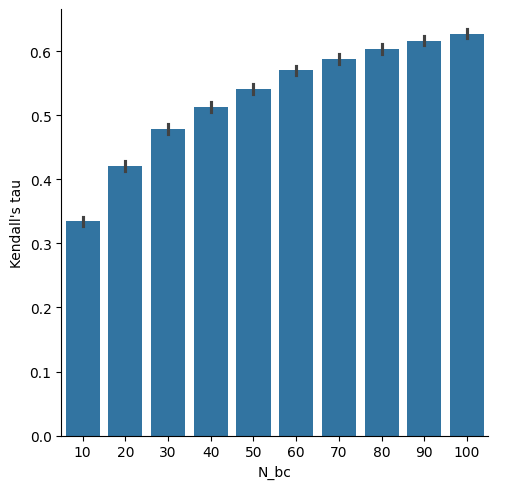

In [36]:
sns.catplot(
    data=dff[dff["Group_size"] == 2],
    x="N_bc",
    y="Kendall's tau",
    # hue="Ko",
    # split=True,
    # row="Weights_shared",
    # col="M",
    # row_order=MODELS,
    # col_order=MODELS,
    kind="bar",
)

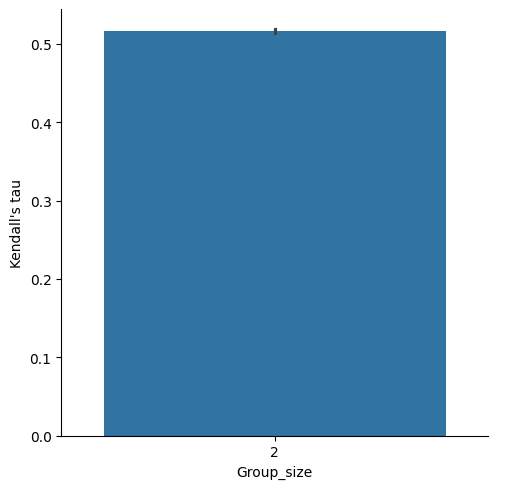

In [29]:
sns.catplot(
    data=dff,
    x="Group_size",
    y="Kendall's tau",
    # hue="Ko",
    # split=True,
    # row="Weights_shared",
    # col="M",
    # row_order=MODELS,
    # col_order=MODELS,
    kind="bar",
)

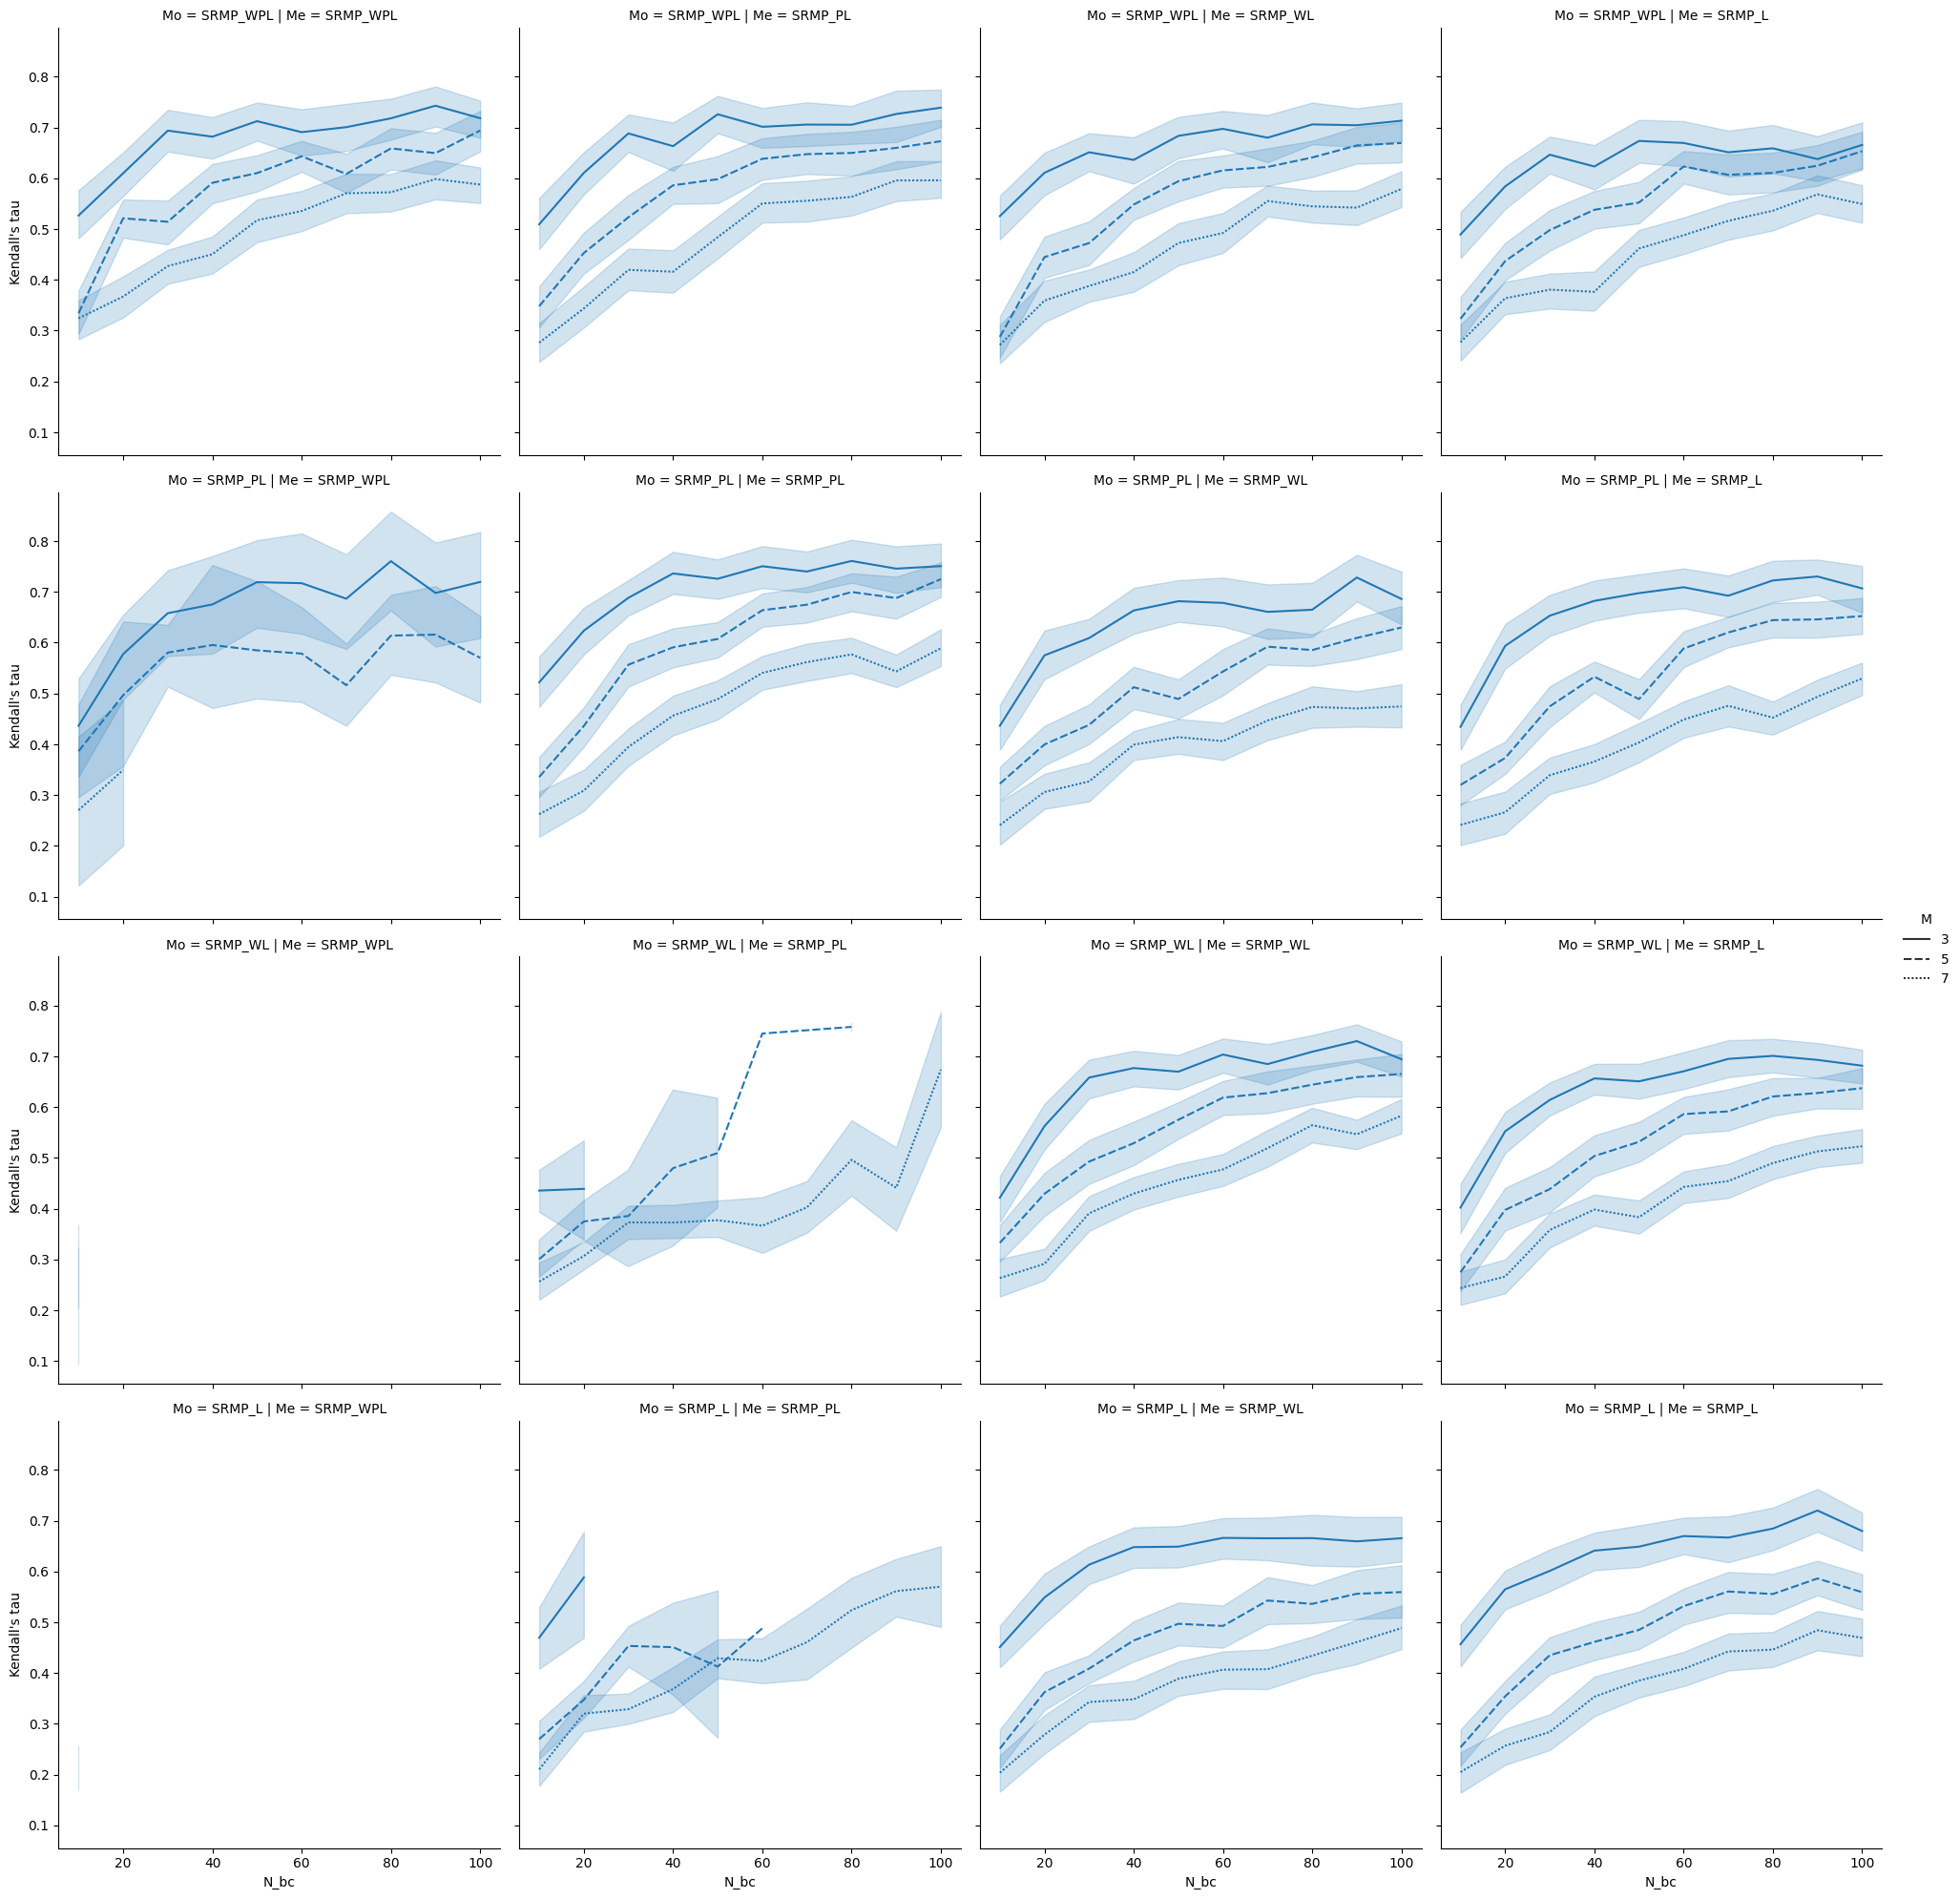

In [ ]:
sns.relplot(
    data=dff[dff["Group_size"] == 2],
    x="N_bc",
    y="Kendall's tau",
    style="M",
    # hue="Group_size",
    row="Mo",
    col="Me",
    row_order=MODELS,
    col_order=MODELS,
    kind="line",
    # errorbar=("ci", 95),
    # err_style="bars",
    # err_kws={"capsize": 5},
)

In [30]:
sns.relplot(
    data=dff[dff["Group_size"] == 3],
    x="N_bc",
    y="Kendall's tau",
    style="M",
    # hue="Group_size",
    row="Mo",
    col="Me",
    row_order=MODELS,
    col_order=MODELS,
    kind="line",
    # errorbar=("ci", 95),
    # err_style="bars",
    # err_kws={"capsize": 5},
)

TypeError: 'NoneType' object is not iterable

## Mo intra Kendall's tau

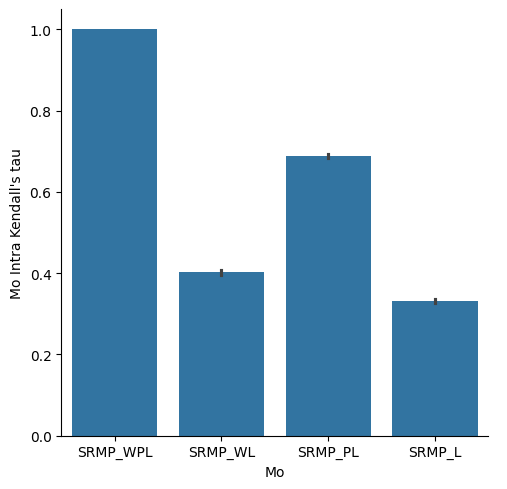

In [31]:
sns.catplot(
    data=dff[dff["Group_size"] == 2],
    x="Mo",
    y="Mo Intra Kendall's tau",
    # hue="M",
    # hue="Group_size",
    # row="Mo",
    # col="Mo",
    # row_order=MODELS,
    # col_order=MODELS,
    kind="bar",
    # errorbar=("ci", 95),
    # err_style="bars",
    # err_kws={"capsize": 5},
)

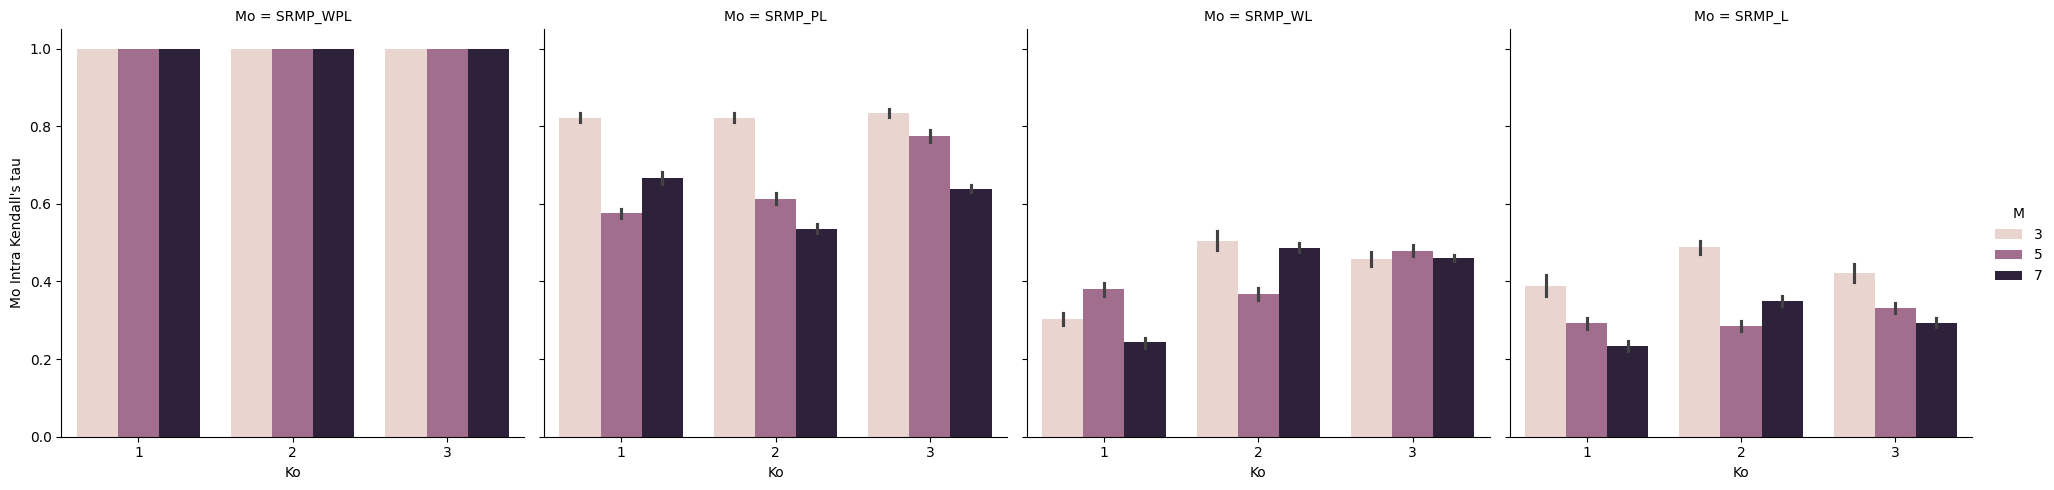

In [32]:
sns.catplot(
    data=dff[dff["Group_size"] == 2],
    x="Ko",
    y="Mo Intra Kendall's tau",
    hue="M",
    # hue="Group_size",
    # row="Mo",
    col="Mo",
    # row_order=MODELS,
    col_order=MODELS,
    kind="bar",
    # errorbar=("ci", 95),
    # err_style="bars",
    # err_kws={"capsize": 5},
)

## Me intra Kendall's tau

<Axes: xlabel='Me', ylabel='Mo'>

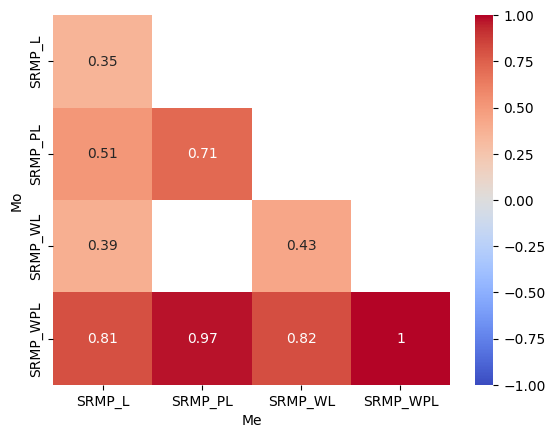

In [33]:
import numpy as np


sns.heatmap(
    data=dff.pivot_table(values="Me Intra Kendall's tau", index="Mo", columns="Me", aggfunc="mean", fill_value=0),vmin=-1,
    vmax=1,
    cmap="coolwarm",
    annot=True,
    mask=np.array([[0, 1, 1, 1], [0, 0, 1, 1], [0, 1, 0, 1], [0, 0, 0, 0]])
)

<Axes: xlabel='Me', ylabel='Mo'>

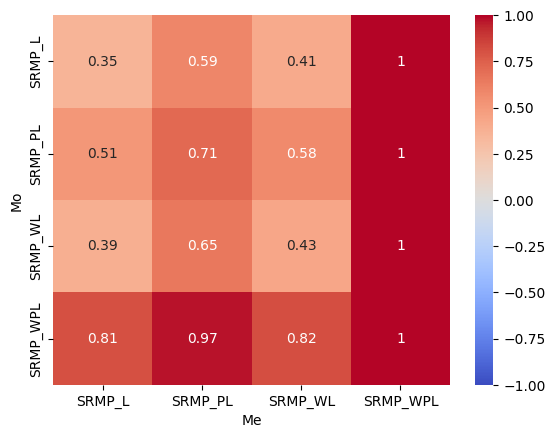

In [34]:
sns.heatmap(
    data=dff.pivot_table(values="Me Intra Kendall's tau", index="Mo", columns="Me", aggfunc="mean", fill_value=0),vmin=-1,
    vmax=1,
    cmap="coolwarm",
    annot=True,
)